In [92]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [93]:
# Let's import the dataset

url = 'https://raw.githubusercontent.com/Jenarth/SCS3250-Group-2-Final-Project/master/Final%20Dataset.csv'
df = pd.read_csv(url, header = 0, sep =',',parse_dates=['Date'])

In [94]:
# Let's remove the outliers as well as the holidays period

data= df.loc[(-df.Holiday)&(-df.Outlier)]
data.head(5)

,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
0,2017-03-01,2017,3,2017-03,1,Wednesday,False,13.1,-1.9,5.6,...,243965,115524,41759,65258,709669,1538388,False,1.684403e+06,1.885102e+06,1.483705e+06
1,2017-03-02,2017,3,2017-03,2,Thursday,False,-1.3,-6.4,-3.9,...,251245,115976,41975,64723,710233,1550282,False,1.667167e+06,1.877280e+06,1.457055e+06
2,2017-03-03,2017,3,2017-03,3,Friday,False,-4.3,-8.1,-6.2,...,233488,104386,38029,58671,645929,1413668,False,1.513443e+06,1.722796e+06,1.304090e+06
3,2017-03-04,2017,3,2017-03,4,Saturday,False,-6.5,-11.9,-9.2,...,87326,1518,0,1792,102982,262464,False,3.363528e+05,5.477078e+05,1.249978e+05
4,2017-03-05,2017,3,2017-03,5,Sunday,False,-0.4,-10.6,-5.5,...,62331,1234,0,1135,62998,171582,False,2.407631e+05,3.932424e+05,8.828385e+04


In [15]:
# Convert weekdays into integers

weekday = {'Monday':1 , 'Tuesday':2 , 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
data.Weekday = [weekday[item] for item in data.Weekday]
data.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Date,Year,Month,year_month,Day,Weekday,Holiday,Max Temp (°C),Min Temp (°C),Mean Temp (°C),...,Lakeshore West Ridership,Milton Ridership,Richmond Hill Ridership,Stouffville Ridership,Union Station Ridership,Total GO Ridership,Outlier,Overall Mean,2SD_above,2SD_below
0,2017-03-01,2017,3,2017-03,1,3,False,13.1,-1.9,5.6,...,243965,115524,41759,65258,709669,1538388,False,1.684403e+06,1.885102e+06,1.483705e+06
1,2017-03-02,2017,3,2017-03,2,4,False,-1.3,-6.4,-3.9,...,251245,115976,41975,64723,710233,1550282,False,1.667167e+06,1.877280e+06,1.457055e+06
2,2017-03-03,2017,3,2017-03,3,5,False,-4.3,-8.1,-6.2,...,233488,104386,38029,58671,645929,1413668,False,1.513443e+06,1.722796e+06,1.304090e+06
3,2017-03-04,2017,3,2017-03,4,6,False,-6.5,-11.9,-9.2,...,87326,1518,0,1792,102982,262464,False,3.363528e+05,5.477078e+05,1.249978e+05
4,2017-03-05,2017,3,2017-03,5,7,False,-0.4,-10.6,-5.5,...,62331,1234,0,1135,62998,171582,False,2.407631e+05,3.932424e+05,8.828385e+04


Let's plot our data points on a graph. Here again will take a look specifically at Union Station, a central station in Toronto.

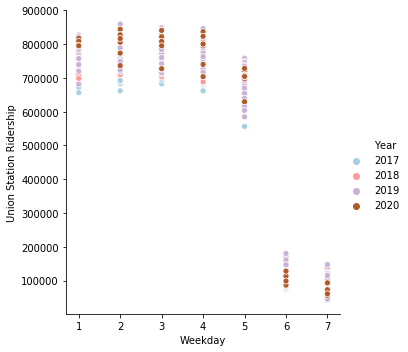

In [16]:
sns.relplot(x='Weekday',y='Union Station Ridership', data=data,hue='Year',palette='Paired')

Let's check our average Riderships for Union Station. 

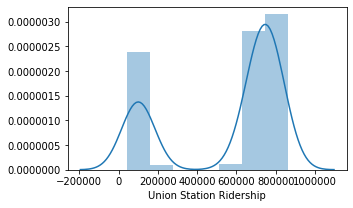

In [17]:
plt.figure(figsize=(5,3))
plt.tight_layout()
sns.distplot(data['Union Station Ridership'])

In [19]:
# Now let's divide the data into attributes ('Weekday') and labels ('Union Station Riderships').

X=data['Weekday'].values.reshape(-1,1)
y=data['Union Station Ridership'].values.reshape(-1,1)

In [20]:
#Split the data to 20% of the data to test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
# Train the algorithm

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[1050212.44404898]
[[-122555.76497414]]


In [23]:
y_pred = regressor.predict(X_test)

In [24]:
# Let's use our test data and see how accurately our algorithm predicts the percentage score.

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()}).round()
df

,Actual,Predicted
0,796254,805101.0
1,744960,559989.0
2,715057,805101.0
3,709744,805101.0
4,806557,805101.0
...,...,...
194,727884,559989.0
195,726795,805101.0
196,731299,437434.0
197,751670,559989.0


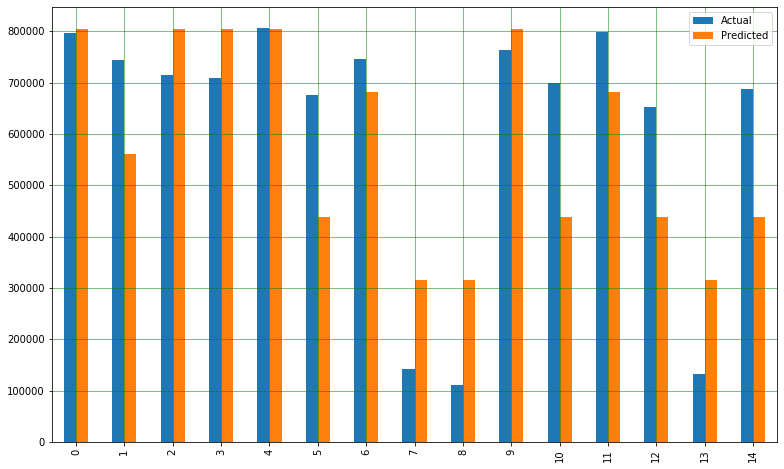

In [25]:
# Let's plot our results 


df1 = df.head(15)
df1.plot(kind='bar',figsize=(13,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### Our initial thought was that by removing the outliers and expanding the data frame to cover the whole year would lead to a more precise predictive model. 
### After running the analysis, the model studied in part 2 seems more accurate.